In [1]:
import pandas as pd
from tqdm import tqdm
import nltk
from pymystem3 import Mystem
from string import punctuation
from nltk.corpus import stopwords

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
import numpy as np

In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dp_user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# TODO надо кластеризовать значения волатильности на волатильные дни и нет

In [5]:
# вообще надо будет попробовать и регрессию и кластеризацию

In [6]:
# для этого точно надо как то закодировать слова

In [7]:
# разные топики и теги будем использовать как разные фичи

In [2]:
data_df = pd.read_excel('imoex_and_news_1_090523.xlsx')

In [6]:
data_df['Мир_Все'].sample(10)  # очень разряженная матрица

370                                                    []
59      ['В США огласили приговор четырем сотрудникам ...
941     ['Австрия отказалась подписывать пакт ООН по\x...
984                                                    []
1168                                                   []
503                                                    []
164                                                    []
99                                                     []
348                                                    []
85                                                     []
Name: Мир_Все, dtype: object

In [7]:
# теперь текст в колонках надо чистить и лемматизировать

In [17]:
topic_tags_df = pd.read_excel(r'/Users/dp_user/PycharmProjects/news_analysis/гуппировка_по_тегам_и_топикам.xlsx', sheet_name='used_keys')

In [18]:
news_cols = topic_tags_df['topic_tags'].to_list()

In [19]:
russian_stopwords = stopwords.words("russian")

In [44]:
russian_stopwords[:5]

['и', 'в', 'во', 'не', 'что']

In [20]:
data_df1 = data_df.copy()

In [21]:
for col in tqdm(news_cols):
    data_df1[col] = data_df1[col].str.lower()
    data_df1[col] = data_df1[col].str.replace('[','').replace(']', '')
    data_df1[col]  = data_df1[col].str.replace('[^а-яА-Яё Ё]', '', regex=True)  # replace all non Cyrillic symbols

100%|██████████| 131/131 [00:00<00:00, 344.30it/s]


In [55]:
# todo теперь надо сделать как советовал chat и сделать из этого фичи как-нибудь (мешок слов, tf_idf и тд)

In [31]:
# + надо еще лемматизировать

In [22]:
mystem = Mystem()

# BagOfWords, topic_tag надо закодировать как отдельные фичу

In [23]:
data_df1.shape

(1232, 143)

In [28]:
vectorizer = CountVectorizer()

NameError: name 'CountVectorizer' is not defined

In [16]:
# TODO нужна функция на каждую строку которую можноо апплаить

In [25]:
del data_df1['Open']
del data_df1['High']
del data_df1['Low']
del data_df1['Close']
del data_df1['Adj Close']
del data_df1['Volume']
del data_df1['log_ret']

In [63]:
# encoding of topic_tags

In [29]:
data_df1 = data_df1.replace('', np.NaN)

In [30]:
for col in tqdm(news_cols):
    data_df1.loc[~data_df1[col].isnull(), col] = 1
    data_df1.loc[data_df1[col].isnull(), col] = 0

100%|██████████| 131/131 [00:00<00:00, 2950.58it/s]


In [31]:
data_df1  # done!

,Date,log_price_spread,week,yr,week_yr,Россия_Все,Мир_Все,Экономика_Все,Наука и техника_Все,Бывший СССР_Все,...,Легпром_Мировой опыт,Ценности_Все,Оружие_Вооружение,Легпром_Все,ЧМ-2014_Все,Легпром_Инновации,_69-я параллель,МедНовости_Все,_Финансы компаний,Сочи_Все
0,2015-01-16,0.025619,3,2015,3_2015,0,1,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
1,2015-01-19,0.033868,4,2015,4_2015,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
2,2015-01-20,0.020928,4,2015,4_2015,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
3,2015-01-21,0.030370,4,2015,4_2015,0,1,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
4,2015-01-22,0.035106,4,2015,4_2015,0,1,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2019-12-23,0.008188,52,2019,52_2019,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
1228,2019-12-24,0.004616,52,2019,52_2019,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
1229,2019-12-26,0.004296,52,2019,52_2019,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0
1230,2019-12-27,0.008190,52,2019,52_2019,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0,0,0.0


In [67]:
# теперь надо весь текст сложить в одну строку и закодировать

In [32]:
data_text_df = data_df.copy()

In [33]:
for col in tqdm(news_cols):
    data_text_df[col] = data_text_df[col].str.lower()
    data_text_df[col] = data_text_df[col].str.replace('[','').replace(']', '')
    data_text_df[col]  = data_text_df[col].str.replace('[^а-яА-Яё Ё]', '', regex=True)  # replace all non Cyrillic symbols

100%|██████████| 131/131 [00:00<00:00, 427.57it/s]


In [34]:
data_text_df = data_text_df.set_index('Date')

In [35]:
del data_text_df['Open']
del data_text_df['High']
del data_text_df['Low']
del data_text_df['Close']
del data_text_df['Adj Close']
del data_text_df['Volume']
del data_text_df['log_ret']
del data_text_df['log_price_spread']

In [36]:
del data_text_df['week']
del data_text_df['yr']
del data_text_df['week_yr']

In [37]:
data_text_df1 = data_text_df.astype(str).agg(' '.join, axis=1).to_frame()

In [38]:
data_text_df1 = data_text_df1.rename(columns={0: 'text_news'})

In [39]:
data_text_df1

,text_news
Date,
2015-01-16,меркель случайно назвала антисемитизм граждан...
2015-01-19,ес выступил против исключения хамас изсп...
2015-01-20,японский премьер пообещал сделать все во...
2015-01-21,лидер антиисламского движения ушел споста пос...
2015-01-22,мэр лондона согласился заплатить налог ради п...
...,...
2019-12-23,...
2019-12-24,...
2019-12-26,...


In [31]:
# to do: вот тут каждую строку нужно токенизировать правильно

In [40]:
def token_processing(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)
    return text

In [41]:
data_text_df1['cleaned_text'] = data_text_df1['text_news'].apply(token_processing)  # 15:00

In [42]:
data_text_df1[['text_news', 'cleaned_text']].sample(5)

,text_news,cleaned_text
Date,,
2019-08-20,россияне высказались освоем буд...,россиянин высказываться освоем будущее российс...
2019-02-19,раскрыт размер гитлеровских пен...,раскрывать размер гитлеровский пенсия следоват...
2017-07-25,эрдоган удивился заявлению пентагона оза...,эрдоган удивляться заявление пентагон озакупка...
2019-02-22,пытавшие многодетную мать полиц...,пытать многодетный мать полицейский избегать н...
2018-10-16,трамп пригрозил гондурасу в польше уничт...,трамп пригрозить гондурас польша уничтожать па...


In [43]:
data_text_df1[['text_news', 'cleaned_text']].sample(5).to_excel('sample_cleaned_text.xlsx')

In [45]:
X = vectorizer.fit_transform(data_text_df1['cleaned_text'])

In [38]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
X.shape  # получще но все равно слишком много

(1232, 71862)

In [41]:
# сделаем кастомный токенайзер

In [85]:
def custom_tokenizer(sentences, choosed_roots):
    words = []
    for sentence in tqdm(sentences):
        w = sentence.split()
        w = stemmer.stem(w)
        if w in choosed_roots:
            words.extend(w)
    words = list(set(words))
    return words

In [86]:
def bow_generator(allsentences, vocab_list=None):
    if not vocab_list:
        vocab = custom_tokenizer(allsentences)
    else:
        vocab = vocab_list
    bag_vectors = []
    for sentence in tqdm(allsentences):
        words = sentence.split()
        bag_vector = np.zeros(len(vocab))
        for w in words:
            for i, word in enumerate(vocab):
                if word == stemmer.stem(w):
                    bag_vector[i] += 1
        bag_vectors.append(bag_vector)
    return vocab, bag_vectors

In [87]:
vocab, bag_vectors = bow_generator(data_text_df1['cleaned_text'].to_list(), choosed_roots)

100%|██████████| 1232/1232 [04:50<00:00,  4.24it/s]


In [48]:
# vocab = custom_tokenizer(data_text_df1['cleaned_text'].to_list())

In [88]:
len(vocab)

12667

In [75]:
vocab1 = [x for x in tqdm(vocab) if x in names or x in slovar]

 26%|██▌       | 18607/71879 [19:50<12:12, 72.70it/s]    

KeyboardInterrupt: 

In [77]:
vocab_df = pd.DataFrame()

In [78]:
vocab_df['vocab'] = vocab

In [79]:
names_df = pd.DataFrame()
names_df['names'] = names

In [80]:
slovar_df = pd.DataFrame()
slovar_df['slovar'] = slovar

In [86]:
vocab_list = vocab_df.loc[(vocab_df['vocab'].isin(names))|(vocab_df['vocab'].isin(slovar))]['vocab'].to_list()  # гораздо лучше

In [90]:
len(bag_vectors)

1232

In [100]:
vocab_vector_df = pd.DataFrame.from_dict(dict(zip(vocab_list, bag_vectors)), orient='index')

In [101]:
vocab_vector_df.shape

(1232, 24492)

In [102]:
vocab_vector_df

,0,1,2,3,4,5,6,7,8,9,...,24482,24483,24484,24485,24486,24487,24488,24489,24490,24491
перебежать,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
кровяной,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
давящий,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
косов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
высоковольтный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
человечек,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
господин,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
распад,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
шишкина,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
vocab_vector_df = pd.DataFrame(columns=vocab_list)

In [89]:
vocab_vector_df = pd.DataFrame(bag_vectors, columns=vocab)

In [90]:
vocab_vector_df.shape

(1232, 12667)

In [92]:
vocab_vector_df.to_excel('vocab_vectors.xlsx', index=False)

In [6]:
vocab_vector_df = pd.read_excel('vocab_vectors.xlsx')

In [8]:
vocab_vector_df

,аббас,абдулл,абитуриент,абляз,абонемент,абонент,абонентск,абориг,аборт,абрамович,...,ясл,ясност,ястреб,яхт,яхтсм,ячейк,яшин,ящер,ящериц,ящик
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
column_sums = vocab_vector_df.sum(axis=0).to_frame()

In [123]:
column_sums = column_sums.rename(columns={0:'freq'})

In [127]:
column_sums.sort_values(by='freq', ascending=False).reset_index().to_excel('most_frequent_tokens.xlsx', index=False)

In [ ]:
column_sums

2

In [4]:
column_sums = pd.read_excel('most_frequent_tokens.xlsx')

In [24]:
tokens_df = column_sums.rename(columns={'index': 'token'})

In [26]:
tokens_df.columns

Index(['token', 'freq'], dtype='object')

In [35]:
tokens_df

,token,freq,root
0,россия,11543,росс
1,российский,8538,российск
2,называть,7760,называ
3,россиянин,5272,россиянин
4,путин,5184,путин
...,...,...,...
24487,ивлеев,1,ивле
24488,двухступенчатый,1,двухступенчат
24489,девятимесячный,1,девятимесячн
24490,сосуществование,1,сосуществован


In [27]:
tokens_df['root'] = tokens_df['token'].apply(lambda x: stemmer.stem(x))

In [30]:
rooted_tokens_df = tokens_df[['root', 'freq']].groupby('root').agg({'freq': 'sum'}).reset_index()

In [40]:
rooted_tokens_df.sort_values(by='freq', ascending=False)

,root,freq,perc
16420,росс,11547,1.526860
16422,российск,8538,1.128980
9654,называ,7761,1.026237
16424,россиянин,5272,0.697117
15416,путин,5227,0.691166
...,...,...,...
10941,обидчив,1,0.000132
10950,обиталищ,1,0.000132
10952,обител,1,0.000132
10953,обк,1,0.000132


In [84]:
choosed_roots = rooted_tokens_df.loc[rooted_tokens_df['freq']>2]['root'].to_list()[2:]

In [ ]:
# todo оставим только слова от 2х повторений и среди них посчитаем корреляцию

In [42]:
rooted_tokens_df.columns

Index(['root', 'freq', 'perc'], dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

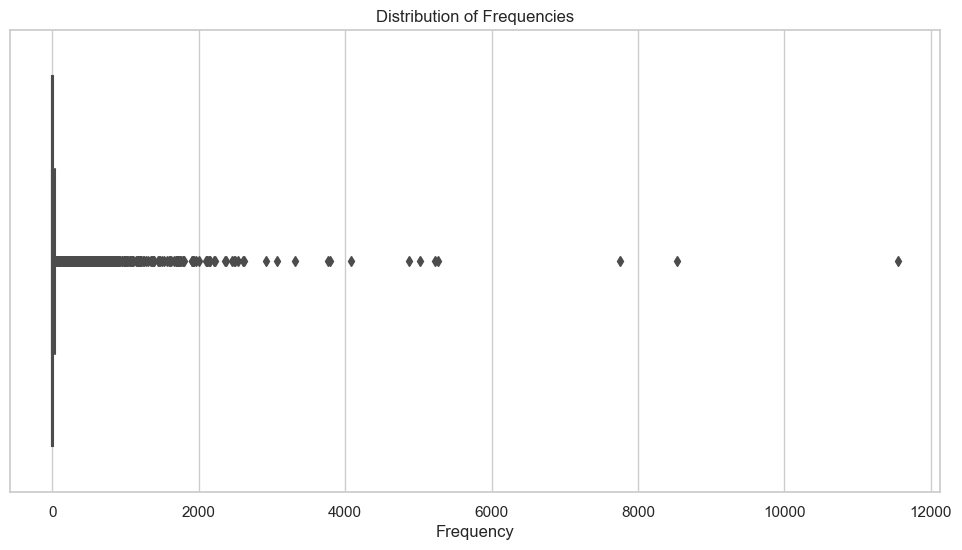

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a box plot for the 'freq' column
sns.boxplot(x=rooted_tokens_df['freq'])

# Add title and labels
plt.title("Distribution of Frequencies")
plt.xlabel("Frequency")

# Display the plot
plt.show()

In [46]:
q1 = rooted_tokens_df['freq'].quantile(0.25)
q2 = rooted_tokens_df['freq'].quantile(0.5)
q3 = rooted_tokens_df['freq'].quantile(0.75)

# Print quantiles
print(f"25th percentile (Q1): {q1}")
print(f"50th percentile (Q2, Median): {q2}")
print(f"75th percentile (Q3): {q3}")

25th percentile (Q1): 1.0
50th percentile (Q2, Median): 4.0
75th percentile (Q3): 15.0


In [39]:
rooted_tokens_df['perc'] = 100 * (rooted_tokens_df['freq'] / rooted_tokens_df['freq'].sum())

In [11]:
from nltk.stem.snowball import SnowballStemmer

In [12]:
stemmer = SnowballStemmer("russian")

In [13]:
def remove_single_root_words(text, stemmer):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    final_words = [word for word in words if stemmed_words.count(stemmer.stem(word)) > 1]
    return ' '.join(final_words)

In [14]:
stemmed_words = [stemmer.stem(word) for word in tokens_df['token'].to_list()]

In [15]:
final_words = [word for word in tokens_df['token'].to_list() if stemmed_words.count(stemmer.stem(word)) > 1]

In [16]:
len(final_words)

5149

In [34]:
final_words

['россия',
 'называть',
 'путин',
 'новый',
 'находить',
 'отказываться',
 'заявлять',
 'обвинять',
 'раскрывать',
 'суд',
 'задерживать',
 'дело',
 'объяснять',
 'киев',
 'свой',
 'призывать',
 'получать',
 'начинать',
 'решать',
 'оказываться',
 'признавать',
 'миллион',
 'первый',
 'объявлять',
 'банк',
 'сеть',
 'показывать',
 'захотеть',
 'цена',
 'попросить',
 'попадать',
 'обнаруживать',
 'узнавать',
 'потребовать',
 'создавать',
 'число',
 'дом',
 'главный',
 'китай',
 'страна',
 'газ',
 'ученый',
 'медведев',
 'умирать',
 'впервые',
 'устраивать',
 'ради',
 'отправлять',
 'снимать',
 'пожаловаться',
 'школьник',
 'разрешать',
 'мир',
 'нато',
 'подел',
 'подробность',
 'весь',
 'рост',
 'пожар',
 'открывать',
 'проводить',
 'выборы',
 'армия',
 'машина',
 'сирия',
 'увольнять',
 'крупный',
 'мэр',
 'возбуждать',
 'германия',
 'вернуть',
 'принимать',
 'рад',
 'курс',
 'вводить',
 'евро',
 'закон',
 'продавать',
 'проверять',
 'спасать',
 'летний',
 'место',
 'попытаться',
 'по

In [19]:
word_to_stem = {word: stemmer.stem(word) for word in tokens_df.columns}

In [20]:
tokens_df.columns = [word_to_stem[word] for word in tokens_df.columns]

In [22]:
tokens_df

,token
0,россия
1,российский
2,называть
3,россиянин
4,путин
...,...
24487,ивлеев
24488,двухступенчатый
24489,девятимесячный
24490,сосуществование


In [93]:
vocab_vector_df.shape

(1232, 12667)

In [95]:
vocab_vector_df.shape

(1232, 12667)

In [ ]:
# 11.05.23 продолжаем отсюда
# todo надо еще проверить корреляцию со спредом

In [96]:
# приставим спред

In [99]:
merged_df = pd.concat([vocab_vector_df, data_df['log_price_spread']], axis=1)

In [ ]:
correlation_matrix = merged_df.corr()

In [9]:
# correlation with numpy

In [10]:
vocab_vector_array = vocab_vector_df.to_numpy()
target_array = data_df['log_price_spread'].to_numpy()

In [11]:
vocab_vector_std = (vocab_vector_array - np.mean(vocab_vector_array, axis=0)) / np.std(vocab_vector_array, axis=0)
target_std = (target_array - np.mean(target_array)) / np.std(target_array)

/var/folders/0d/nn90v_dn4y56s_xnhsv23lf00000gn/T/ipykernel_10709/3089772568.py:1: RuntimeWarning: invalid value encountered in divide
  vocab_vector_std = (vocab_vector_array - np.mean(vocab_vector_array, axis=0)) / np.std(vocab_vector_array, axis=0)


In [13]:
correlation = np.dot(vocab_vector_std.T, target_std) / (vocab_vector_std.shape[0] - 1)

In [14]:
sorted_indices = np.argsort(np.abs(correlation))[::-1]
sorted_correlation = correlation[sorted_indices]
sorted_tokens = vocab_vector_df.columns[sorted_indices]

In [15]:
sorted_tokens

Index(['обоснован', 'необъясним', 'неоплачен', 'неонацистск', 'неожидан',
       'неожида', 'неоднозначн', 'необязательн', 'необычн', 'необъективн',
       ...
       'наш', 'ботинок', 'тренд', 'ротенберг', 'кенгуренок', 'контрафакт',
       'сепаратизм', 'снаряд', 'рекс', 'советник'],
      dtype='object', length=12667)

In [17]:
sorted_correlation

array([            nan,             nan,             nan, ...,
        2.72282964e-05,  1.65844183e-05, -2.62824116e-06])

In [18]:
# Create a new NumPy array with the sorted tokens and their corresponding correlation values
sorted_tokens_correlation = np.column_stack((sorted_tokens, sorted_correlation))

# Convert the NumPy array to a pandas DataFrame
sorted_tokens_correlation_df = pd.DataFrame(sorted_tokens_correlation, columns=['Token', 'Correlation'])

In [38]:
sorted_tokens_correlation_df.sort_values(by='Correlation', ascending=False).to_excel('most_correlated_tokens.xlsx', index=False)

In [45]:
sorted_tokens_correlation_df = pd.read_excel('most_correlated_tokens.xlsx')

In [46]:
sorted_tokens_correlation_df

,Token,Correlation
0,курс,0.281233
1,радиомаяк,0.198814
2,доллар,0.189085
3,нотариус,0.181600
4,коммерсант,0.179236
...,...,...
12662,разрешен,NaN
12663,блатн,NaN
12664,санкционирова,NaN
12665,сайг,NaN


In [23]:
data_df['log_price_spread'].min()

0.0

In [24]:
data_df['log_price_spread'].max()

0.0955512875394593

In [44]:
sorted_tokens_correlation_df.loc[(sorted_tokens_correlation_df['Correlation']>0.05) | (sorted_tokens_correlation_df['Correlation']<-0.05)]  # вот такие токены надо оставить

,Token,Correlation
9055,курс,0.281233
9056,россиянин,-0.200833
9057,радиомаяк,0.198814
9058,доллар,0.189085
9059,нотариус,0.1816
...,...,...
9444,банкомат,-0.05013
9445,разнос,-0.050112
9446,облик,-0.05009
9447,икот,-0.050077


In [51]:
most_valuable_tokens = sorted_tokens_correlation_df.loc[(sorted_tokens_correlation_df['Correlation']>0.05) | (sorted_tokens_correlation_df['Correlation']<-0.05)]

In [ ]:
# посчитаем корреляцию между наиболее значимыми токенами

In [54]:
selected_token_columns = most_valuable_tokens['Token'].values

In [55]:
filtered_vocab_vector_df = vocab_vector_df[selected_token_columns]

In [56]:
standardized_data = (filtered_vocab_vector_df - filtered_vocab_vector_df.mean()) / filtered_vocab_vector_df.std()

# Step 3: Calculate the correlation matrix using the standardized dataset
correlation_matrix = np.corrcoef(standardized_data.T)

In [57]:
correlation_matrix

array([[ 1.00000000e+00, -2.97428192e-01,  3.10733910e-02, ...,
        -5.12081363e-02,  7.41869443e-04,  1.23195494e-02],
       [-2.97428192e-01,  1.00000000e+00,  1.33392015e-02, ...,
         6.27534731e-02, -3.33177272e-02, -3.42732711e-02],
       [ 3.10733910e-02,  1.33392015e-02,  1.00000000e+00, ...,
        -5.52394168e-03, -2.81978177e-03, -4.46939854e-03],
       ...,
       [-5.12081363e-02,  6.27534731e-02, -5.52394168e-03, ...,
         1.00000000e+00, -6.38109501e-03, -1.01141362e-02],
       [ 7.41869443e-04, -3.33177272e-02, -2.81978177e-03, ...,
        -6.38109501e-03,  1.00000000e+00, -5.16291778e-03],
       [ 1.23195494e-02, -3.42732711e-02, -4.46939854e-03, ...,
        -1.01141362e-02, -5.16291778e-03,  1.00000000e+00]])

In [68]:
correlation_threshold = 0.3  # Adjust this threshold to control the level of correlation between token pairs

# Find indices of token pairs with correlation greater than the threshold
correlated_token_indices = np.where(np.abs(correlation_matrix) > correlation_threshold)
correlated_token_pairs = [(selected_token_columns[i], selected_token_columns[j]) for i, j in zip(*correlated_token_indices) if i != j and i < j]

In [69]:
correlated_token_pairs

[('курс', 'доллар'),
 ('россиянин', 'способ'),
 ('россиянин', 'ребенок'),
 ('россиянин', 'город'),
 ('россиянин', 'регион'),
 ('россиянин', 'врач'),
 ('россиянин', 'сми'),
 ('доллар', 'сми'),
 ('мухаммед', 'пророк'),
 ('ребенок', 'регион'),
 ('детдомовец', 'гузеев'),
 ('индекс', 'видеоигр'),
 ('факультет', 'попс'),
 ('свид', 'восход'),
 ('свид', 'фотоаппарат'),
 ('суд', 'сми'),
 ('приверженец', 'амур'),
 ('приверженец', 'пассажиропоток'),
 ('приверженец', 'налед'),
 ('гузеев', 'тестостерон'),
 ('гузеев', 'жуков'),
 ('синтез', 'са'),
 ('конюх', 'федор'),
 ('стриж', 'безбожник'),
 ('джонсон', 'борис'),
 ('госзаказ', 'батурин'),
 ('пургин', 'ком'),
 ('демчишин', 'частник'),
 ('батурин', 'медвед'),
 ('ва', 'откат'),
 ('цукерберг', 'хорек'),
 ('видеоигр', 'изменщик'),
 ('видеоигр', 'меламед'),
 ('видеоигр', 'аванс'),
 ('сом', 'райкин'),
 ('тестостерон', 'нат'),
 ('чен', 'ким'),
 ('автогонщик', 'райкин'),
 ('медвед', 'чак'),
 ('электрон', 'частник'),
 ('дуб', 'катализатор'),
 ('катализатор',

In [70]:
filtered_vocab_vector_df

,курс,россиянин,радиомаяк,доллар,нотариус,способ,коммерсант,турист,мухаммед,пассажир,...,комендант,китаец,путч,фашизм,миф,банкомат,разнос,облик,икот,томат
0,0,3,0,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
filtered_vocab_vector_df.loc[~(filtered_vocab_vector_df == 0).all(axis=1)]  # хорошо вообще

,курс,россиянин,радиомаяк,доллар,нотариус,способ,коммерсант,турист,мухаммед,пассажир,...,комендант,китаец,путч,фашизм,миф,банкомат,разнос,облик,икот,томат
0,0,3,0,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0,16,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1218,0,11,0,0,0,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1219,0,11,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1220,0,16,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [79]:
filtered_vocab_vector_df1 = filtered_vocab_vector_df.loc[~(filtered_vocab_vector_df == 0).all(axis=1)].copy()

# в 99% мы сможем что то сказать

In [80]:
filtered_vocab_vector_df1.to_excel('filtered_vocab.xlsx', index=False)

In [81]:
filtered_vocab_vector_df1 = pd.concat([filtered_vocab_vector_df1, data_df['log_price_spread']], axis=1)

In [84]:
filtered_vocab_vector_df1.to_excel('features_and_target.xlsx', index=False)

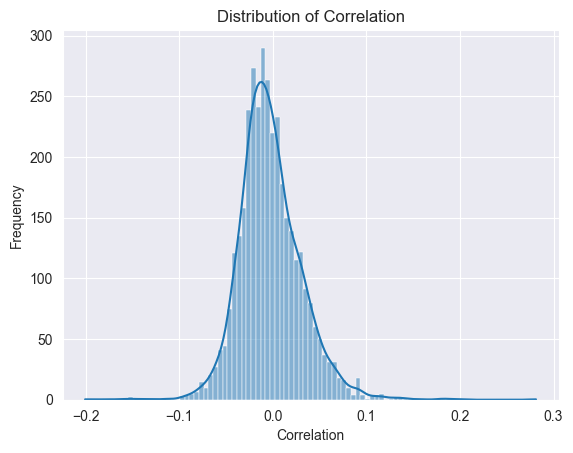

In [48]:
corr_df = sorted_tokens_correlation_df['Correlation']

# Plot the histogram and kernel density plot
sns.histplot(corr_df, kde=True)

# Set the title and labels
plt.title('Distribution of Correlation')
plt.xlabel('Correlation')
plt.ylabel('Frequency')

# Show the plot
plt.savefig('distr_of_token_corr.png')
#plt.show()

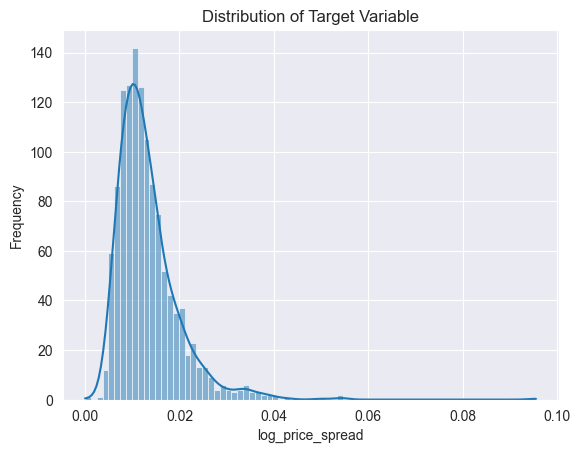

In [5]:
target = data_df['log_price_spread']

# Plot the histogram and kernel density plot
sns.histplot(target, kde=True)

# Set the title and labels
plt.title('Distribution of Target Variable')
plt.xlabel('log_price_spread')
plt.ylabel('Frequency')

# Show the plot
plt.savefig('distr_of_target.png')
# plt.show()

In [6]:
data_df['log_price_spread'].median()

0.011806702533972755

In [8]:
data_df['log_price_spread'].mean()

0.013294167614588062

In [14]:
data_df['log_price_spread'].mode()[1]

0.00355232666423877

In [10]:
data_df['log_price_spread'].mode()

0       0.000000
1       0.003552
2       0.003958
3       0.004132
4       0.004248
          ...   
1227    0.043069
1228    0.049912
1229    0.054191
1230    0.054250
1231    0.095551
Name: log_price_spread, Length: 1232, dtype: float64

In [ ]:
correlation_matrix = vocab_vector_df.corr()

In [ ]:
correlation_matrix.values[[np.arange(correlation_matrix.shape[0])]*2] = 0
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False, kind="quicksort")

In [55]:
slovar = open('russian.txt', encoding='cp1251').readlines()

In [63]:
slovar = [x.replace('\n', '') for x in slovar]

In [65]:
slovar[465789]

'китёнышами'

In [66]:
names = open('russian_surnames.txt', encoding='cp1251').readlines()

In [70]:
names = [x.replace('\n', '').lower() for x in names]

In [73]:
names[98767]

'брусилина'

In [50]:
pd.NA

<NA>

In [47]:
data_df1

,Date,log_price_spread,week,yr,week_yr,Россия_Все,Мир_Все,Экономика_Все,Наука и техника_Все,Бывший СССР_Все,...,Легпром_Мировой опыт,Ценности_Все,Оружие_Вооружение,Легпром_Все,ЧМ-2014_Все,Легпром_Инновации,_69-я параллель,МедНовости_Все,_Финансы компаний,Сочи_Все
0,2015-01-16,0.025619,3,2015,3_2015,,меркель случайно назвала антисемитизм гражданс...,,,,...,,,,,,,,,,
1,2015-01-19,0.033868,4,2015,4_2015,,,,,,...,,,,,,,,,,
2,2015-01-20,0.020928,4,2015,4_2015,,,,,,...,,,,,,,,,,
3,2015-01-21,0.030370,4,2015,4_2015,,лидер антиисламского движения ушел споста посл...,,,,...,,,,,,,,,,
4,2015-01-22,0.035106,4,2015,4_2015,,мэр лондона согласился заплатить налог ради по...,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2019-12-23,0.008188,52,2019,52_2019,,,,,,...,,,,,,,,,,
1228,2019-12-24,0.004616,52,2019,52_2019,,,,,,...,,,,,,,,,,
1229,2019-12-26,0.004296,52,2019,52_2019,,,,,,...,,,,,,,,,,
1230,2019-12-27,0.008190,52,2019,52_2019,,,,,,...,,,,,,,,,,


In [27]:
X = vectorizer.fit_transform(data_df1['Россия_Все'].to_list())

In [28]:
X.shape

(1232, 296)

In [32]:
type(X)

scipy.sparse._csr.csr_matrix

In [35]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
296*130 # не, такие размеры не подходят

38480